Есть данные по прохождению студентами тестов на образовательной платформе.
Необходимо проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

Имеются 3 файла с данными: train.csv - хранятся данные о действиях студента (размер более 5GB), question.csv - содержит данные о заданиях/вопросах, lecture.csv - содержит данные о обучающих материалах для студенов.

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Создадим датафреймы для всех фалов

In [2]:
lecture_df = pd.read_csv('data/lectures.csv')
question_df = pd.read_csv('data/questions.csv')

In [3]:
train_df = pd.read_csv('data/train.csv',
                      dtype={
                          'row_id': 'int32',
                          'timestamp': 'int64',
                          'user_id': 'int32',
                          'content_id': 'int32',
                          'content_type_id': 'int8',
                          'task_container_id': 'int16',
                          'user_answer': 'int8',
                          'answered_correctly': 'int8',
                          'prior_question_elapsed_time': 'float64',
                          'prior_question_had_explanation': 'boolean'
                      })

Исследуем самы обширный фрейм

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 7.2+ GB

In [25]:
#посмотрим общую информацию после преобразования типов при загрузке
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int32  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float64(1), int16(1), int32(3), int64(1), int8(3)
memory usage: 3.3 GB


1. Обратим внимание на типы данных и проверим, можем ли мы изменить их и сокартить объем файла? Сейчас фрейм по памяти занимет более 7.5GB.
2. После преобразования типов при загрузке удалось снизить размер почти в 2 раза до 3.3 GB

In [9]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


Видно, что есть столбцы с избыточными типамии данных, рассмотрим сколько по памяти они занимают и будем пытаться преобразовать типы. В дальнейшем мы перезагрузим сам датафрейм с переопределением типов для сокращения затрат по ресурам и времени на работу с данными

In [26]:
#данные по использованию памяти после изменения типов
train_df.memory_usage(deep=True)

Index                                   128
row_id                            404921328
timestamp                         809842656
user_id                           404921328
content_id                        404921328
content_type_id                   101230332
task_container_id                 202460664
user_answer                       101230332
answered_correctly                101230332
prior_question_elapsed_time       809842656
prior_question_had_explanation    202460664
dtype: int64

Сохраним данные по использованию памяти до изменения типов:

* Index                                    128
* row_id                             809842656
* timestamp                          809842656
* user_id                            809842656
* content_id                         809842656
* content_type_id                    809842656
* task_container_id                  809842656
* user_answer                        809842656
* answered_correctly                 809842656
* prior_question_elapsed_time        809842656
* prior_question_had_explanation    3598112864
* dtype: int64

###### Диапазоны для типов данных:  
* int8 - (-128, 127)
* int16 - (-32 768, 32 767) e+04
* int32 - (-2 147 483 648, 2 147 483 647) e+09
* int64 - (-9 223 372 036 854 775 808, 9 223 372 036 854 775 807) e+18

###### Используем описание полей и максимальное значение:  
* row_id - int32
* timestamp - int64 (без изменений)
* user_id - int32
* content_id - int32
* content_type_id - bool/int8
* task_container_id - int16
* user_answer - int8
* answered_correctly - int8
* prior_question_elapsed_time - float64
* prior_question_had_explanation - boolean

Изменим типы при загрузке данных во фрейм через dtype={}

#### Начниаем исследовать данные

In [37]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Проверим количество уникальных пользователей во фрейме

In [20]:
train_df['user_id'].nunique()

393656

Проверим соотношение просмотров лекций к заданным воросам, 0 - вопрос, 1 - лекция

In [28]:
train_df['content_type_id'].value_counts()

0    99271300
1     1959032
Name: content_type_id, dtype: int64

Целевое значение для нас это верный ответ answered_correctly, посмотри что с ним

In [23]:
train_df['answered_correctly'].value_counts()

 1    65244627
 0    34026673
-1     1959032
Name: answered_correctly, dtype: int64

-1 это просмотр лекций, этот показатель мы не учитываем.  
итого почти 34% не правильных ответов

In [44]:
#посмотрим частоту наиболее используемых пакетов вопросов content_id
train_df[train_df['content_type_id'] == 0]['content_id'].value_counts()

6116     213605
6173     202106
4120     199372
175      195861
7876     190170
          ...  
5823          1
10008         1
10007         1
10006         1
10005         1
Name: content_id, Length: 13523, dtype: int64

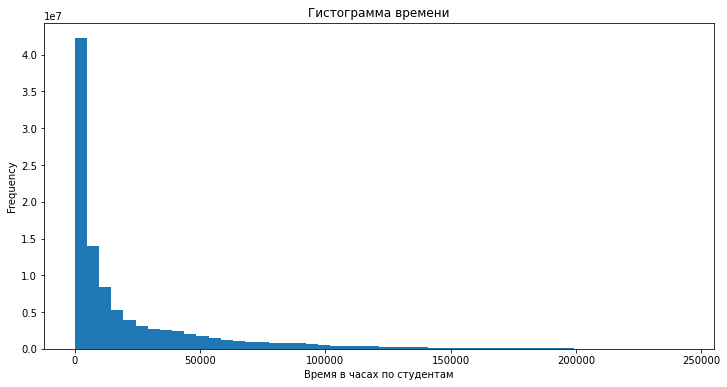

In [7]:
#посмотрим частоту распределения времени timestamp
times = train_df['timestamp'] / 360000
fig = plt.figure(figsize=(12,6))
times.plot.hist(bins=50)
plt.title("Гистограмма времени")
plt.xticks(rotation=0)
plt.xlabel("Время в часах по студентам")
plt.show()

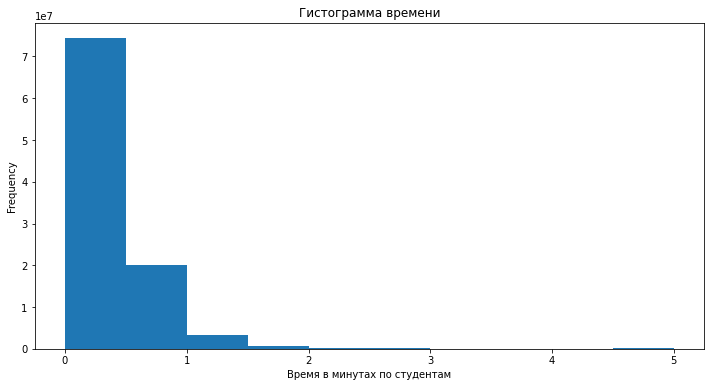

In [8]:
#посмотрим частоту распределения времени решения
times = train_df['prior_question_elapsed_time'] / 60000
fig = plt.figure(figsize=(12,6))
times.plot.hist()
plt.title("Гистограмма времени")
plt.xticks(rotation=0)
plt.xlabel("Время в минутах по студентам")
plt.show()

Видно, что в основномо решение блока занимает не более 1 минуты

### Посмотрим на данные в question_df

In [10]:
question_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


Посмотрим на данные в целом, есть ИД самого вопроса, есть ИД бандла, верный ответ для вопроса, к какой части теста относятся вопросы и набор тэгов для вопросов в бандле.

Посмотрим, сколько есть уникальнх частей для наборов вопросов

In [11]:
question_df['part'].value_counts()

5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: part, dtype: int64

Преобразуем список тэгов в лист и проанализируем данные

In [22]:
question_df['tags'] = question_df['tags'].astype('str')
question_df['tags_list'] = [x.split() for x in question_df['tags'].values]

In [95]:
#проверим сколько всего уникальных тэгов есть (присутствует тэг nan - значит есть бандл без тэгов)
tag_set = {y for x in question_df['tags_list'] for y in x}
display(len(tag_set))

189

In [72]:
#посчитаем количесвто тегов для всех бандлов
question_df['tags_len'] = [len(x) for x in question_df['tags_list']]

<AxesSubplot:xlabel='tags_len', ylabel='Count'>

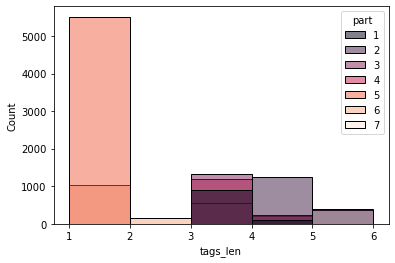

In [86]:
#посмотрим график распределения количества тэгов от части вопроса
sns.histplot(data=question_df, x="tags_len", binwidth=1, hue="part", palette="rocket")

### Посмотрим мету по лекциям

In [87]:
lecture_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [90]:
#всего уникальных ид лекций
lecture_df.shape[0]

418

<AxesSubplot:xlabel='type_of', ylabel='Count'>

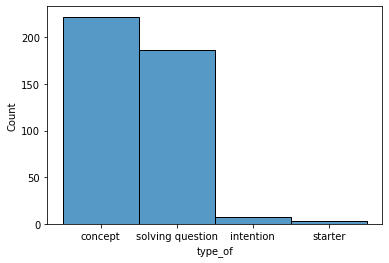

In [91]:
#посмотрим расределение по типу лекций
sns.histplot(data=lecture_df, x="type_of")